In [1]:
import matplotlib.pylab as plt
import numpy as np 

def get_acc(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    best_acc = []
    for line in lines:
        if "Train Epoch" in line:
            try:
                best_acc.append(float(line.split("Best Accuracy:")[-1].split('%')[0]))
            except:
                best_acc.append(float(line.split("Best test Accuracy:")[-1].split('%')[0]))
    acc.append(best_acc)
    
    return best_acc

def plot_dict(data, title):
    plt.figure(figsize=(5,5))
    
    step = float(title.split('_')[-1])
    
    length = 0
    for k in data:
        if len(data[k]) > length:
            length = len(data[k])
    
    xticks = []
    for i in range(length):
        xticks.append((1-step)**i)
    xticks = np.array(xticks)
    
    for key in data:
        if key == 'lt':
            plt.plot(xticks[:len(data[key])],data[key], label=key,c='gray',alpha=0.5)
            plt.scatter(xticks,data[key], c='black')
        elif 'g_kl' in key:
            plt.plot(xticks[:len(data[key])],data[key], label=key, ls='dotted')
            plt.scatter(xticks[:len(data[key])],data[key], marker='*')
        else:
            plt.plot(xticks[:len(data[key])],data[key], label=key, ls='-.')
            plt.scatter(xticks[:len(data[key])],data[key], marker='x')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Parameter ratio after pruning")
    plt.ylabel("Acc")
    plt.xscale("log")
    plt.xlim([1.0, xticks[-1]])
    plt.show()
    
    return

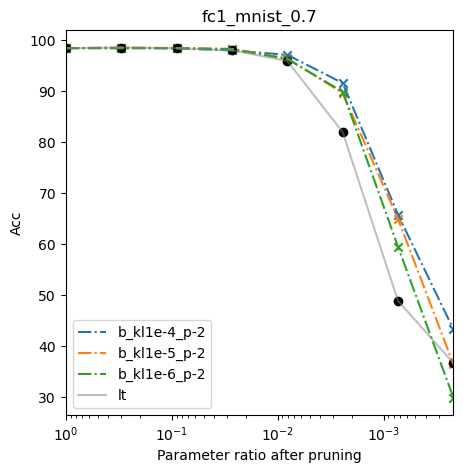

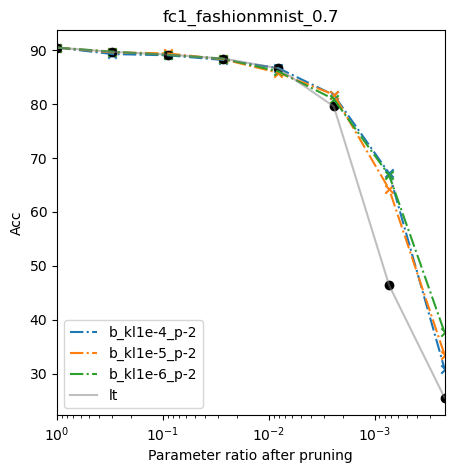

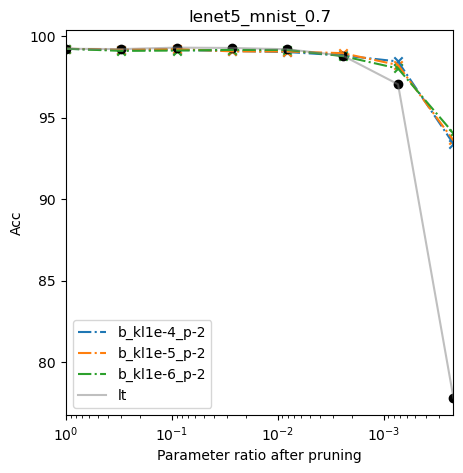

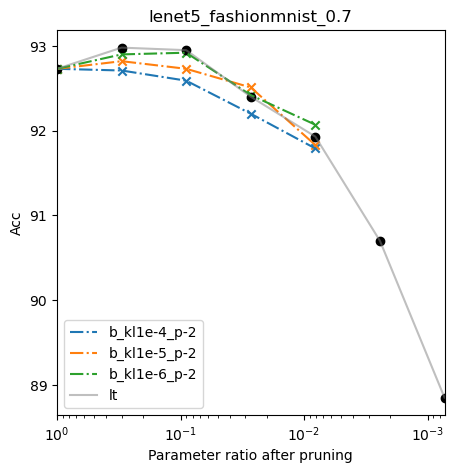

In [2]:
datasets = ["mnist",'fashionmnist']
model = ['fc1', "lenet5"]
prune_rate = [0.7]
kls = ["1e-4","1e-5","1e-6"]
priors = [-2]
root = 'SAVE_Sep20/Adamlr1e-3wd0_initorg/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)     
            
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

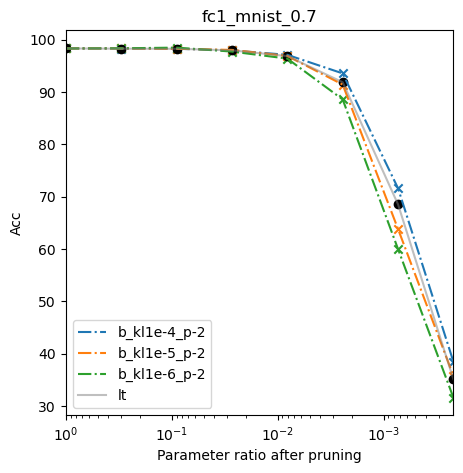

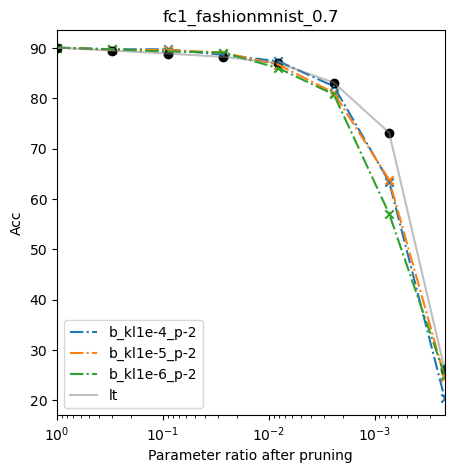

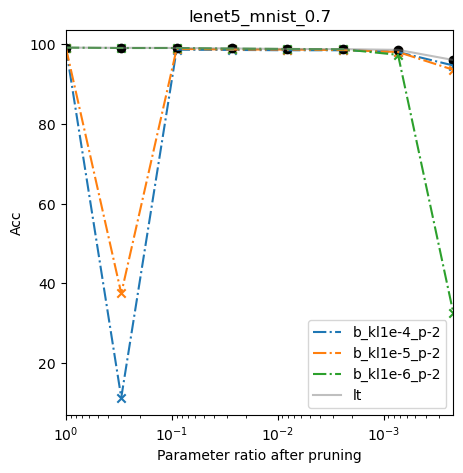

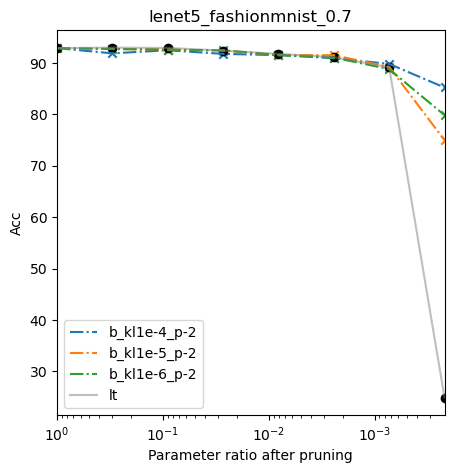

In [3]:
datasets = ["mnist",'fashionmnist']
model = ['fc1', "lenet5"]
prune_rate = [0.7]
kls = ["1e-4","1e-5","1e-6"]
priors = [-2]
root = 'SAVE_Sep20/SGD_lr1e-1wd3e-4_initorg/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)     
            
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

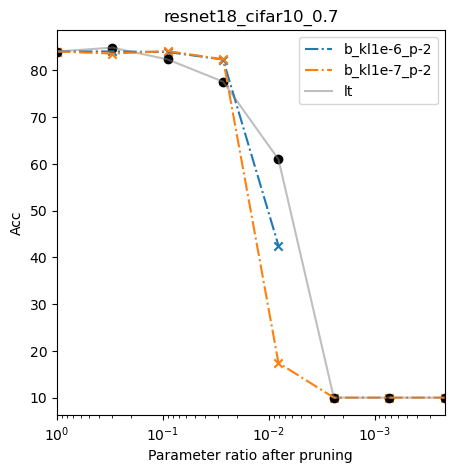

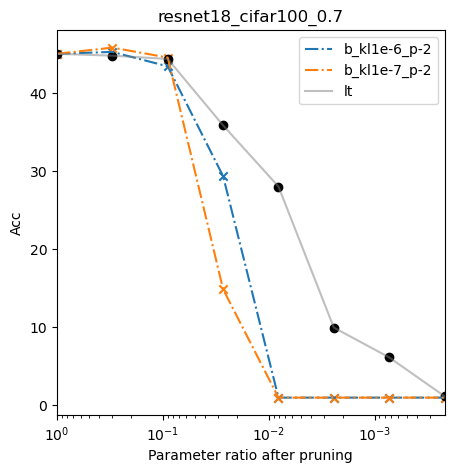

In [4]:
datasets = ["cifar10",'cifar100']
model = ['resnet18']
prune_rate = [0.7]
kls = ["1e-6","1e-7"]
priors = [-2]
root = 'SAVE_Sep20/Adam_lr1e-2wd0_initorg/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)     
            
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))